In [1]:
import sys
sys.path.append('../..')
%load_ext autoreload
%autoreload 2

In [2]:
import spatialpy
import numpy
import matplotlib.pyplot as plt


In [3]:
class All(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        return True

class Top(spatialpy.SubDomain):
    def inside(self, x, on_boundary):
        mask = (x[1] <= 1.0) & (x[1] > 0.95)
        return bool(mask)

In [4]:
class Simple_Diffusion(spatialpy.Model):
    """ Initial condition is a delta function at and off-center point. 
        The solution should be a Gaussian, and periodic boundary conditions
        should allow it to wrap. """

    def __init__(self, model_name="simple_diffusion"):
        spatialpy.Model.__init__(self,model_name)
        
        # System constants
        D = 0.01

        # Define Species
        A = spatialpy.Species(name="A",diffusion_constant=D)
        self.add_species([A])

        # A unit square
        self.mesh = spatialpy.Mesh.create_2D_domain([0,1],[0,1],40,40)

        # Define Subdomains
        self.add_subdomain(All(), 1) # total subdomain, type 1
        self.add_subdomain(Top(), 2) # top subdomains, type 2


        # Place the A molecules in the voxel nearest the center of the square
        self.add_initial_condition(
            spatialpy.PlaceInitialCondition(A,100000,[0,0,0])
        )

        self.timespan(numpy.linspace(0,5,1000))

In [6]:
model = Simple_Diffusion()

totalvolume 1


In [7]:
model.listOfSubdomainIDs

[1, 2]

In [8]:
model.mesh.vol

array([0.000625, 0.000625, 0.000625, ..., 0.000625, 0.000625, 0.000625])

In [9]:
%time result = model.run()

CPU times: user 13.8 s, sys: 22.5 ms, total: 13.8 s
Wall time: 1min 35s


In [11]:
#result.display('A',-1)

In [12]:
def plot_step(t_ndx,key='type'):
    pts, data = result.read_step(t_ndx)
    plt.figure(figsize=(15,10) )
    plt.scatter(pts[:,0],pts[:,1],c=data[key])
    plt.axis('equal')
    plt.colorbar()
    plt.title('t={0}'.format(t_ndx))

def plot_all(key='type'):
    for i,t in enumerate(result.get_timespan()):
        plot_step(i,key)

In [23]:

len(result.get_timespan())

1000

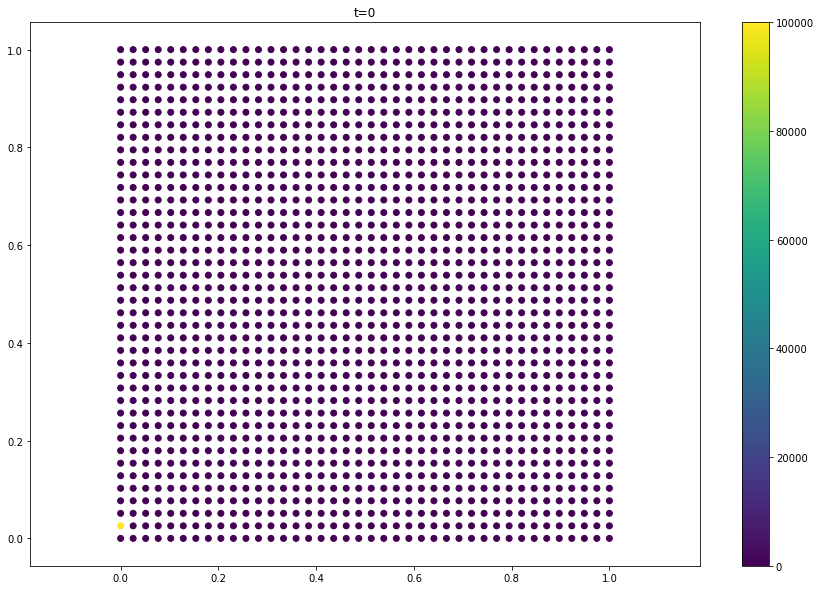

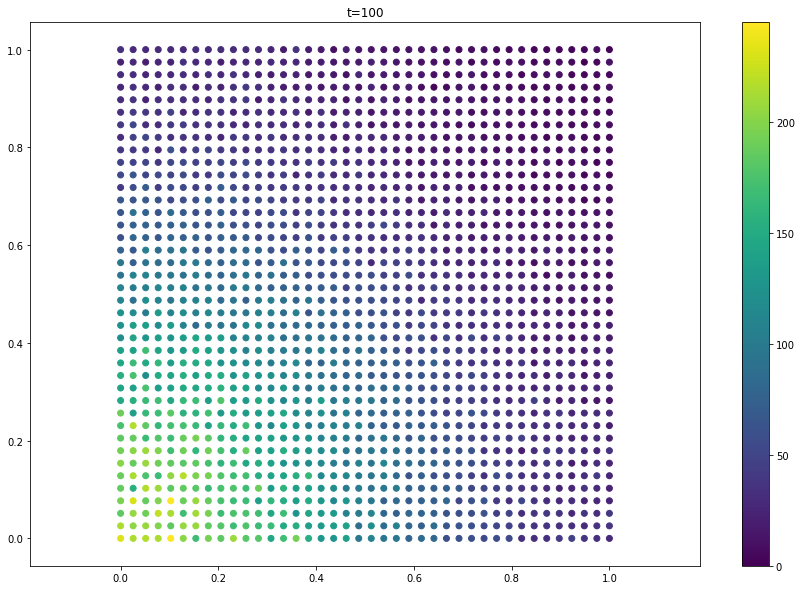

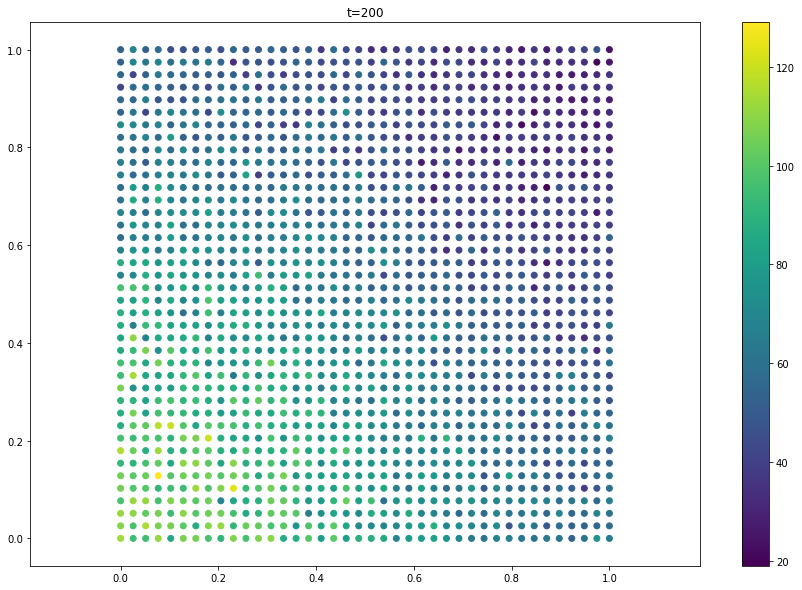

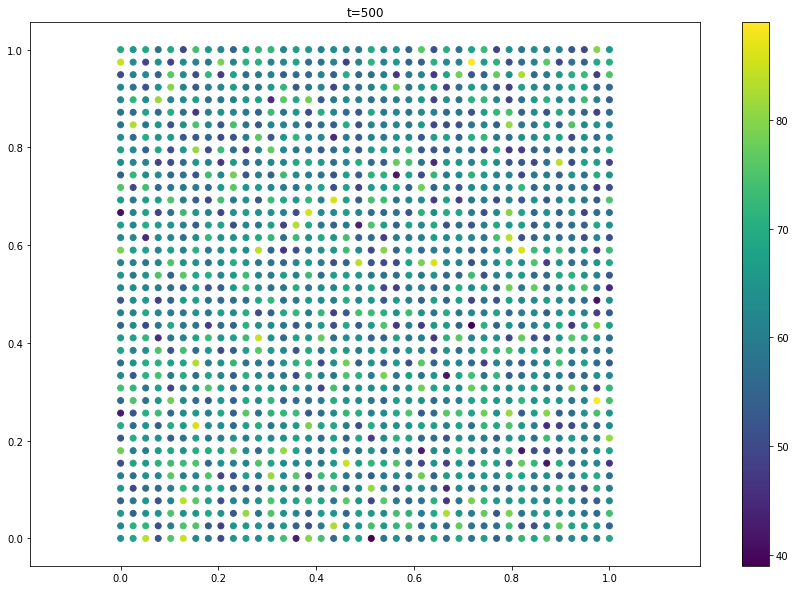

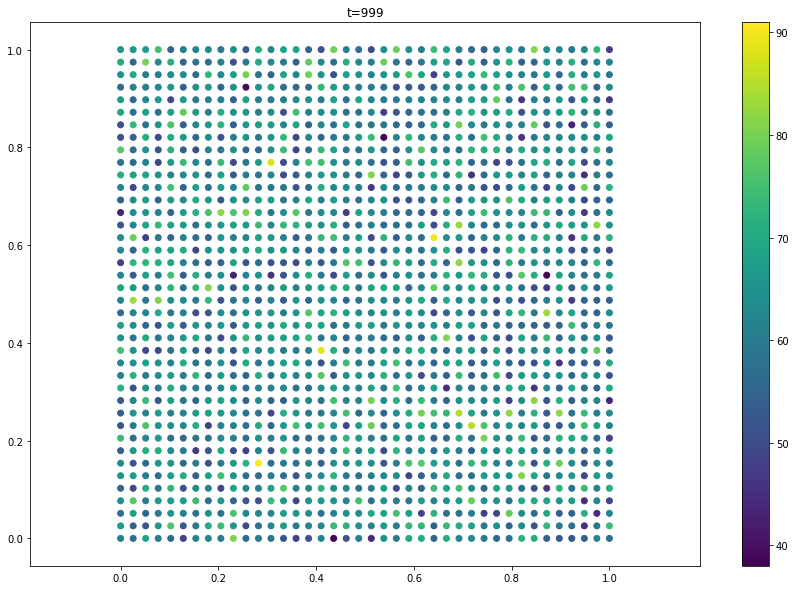

In [24]:
plot_step(0,'D[A]')
plot_step(100,'D[A]')
plot_step(200,'D[A]')
plot_step(500,'D[A]')
plot_step(999,'D[A]')


In [15]:
#plot_all('D[A]')